# Time-Series Revenue and Churn Analysis

This notebook analyzes revenue and churn trends over time to identify seasonal patterns and risk periods.

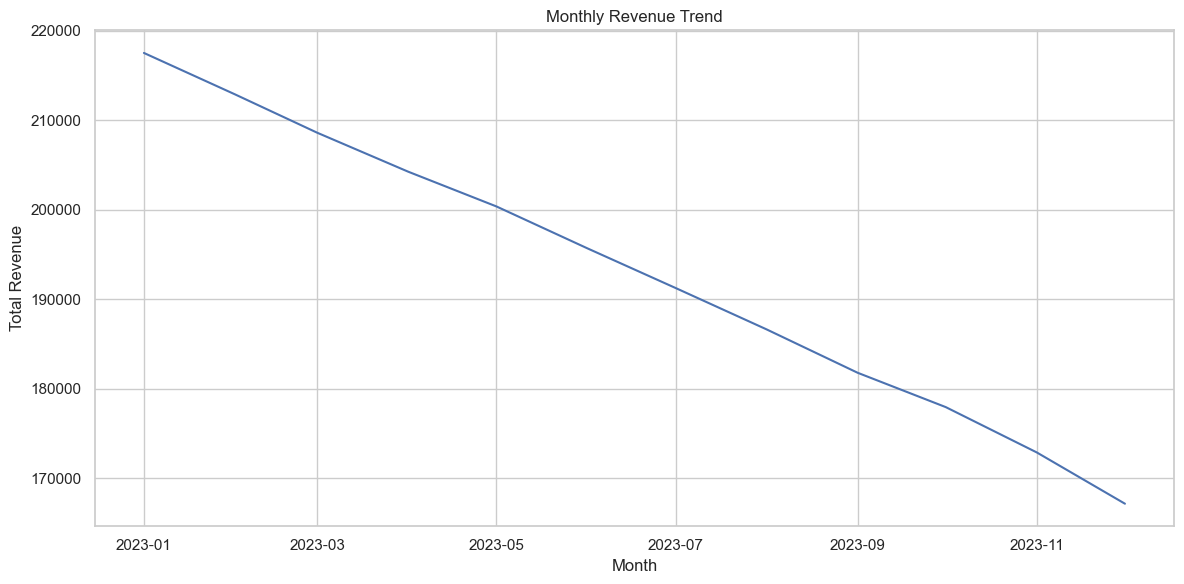

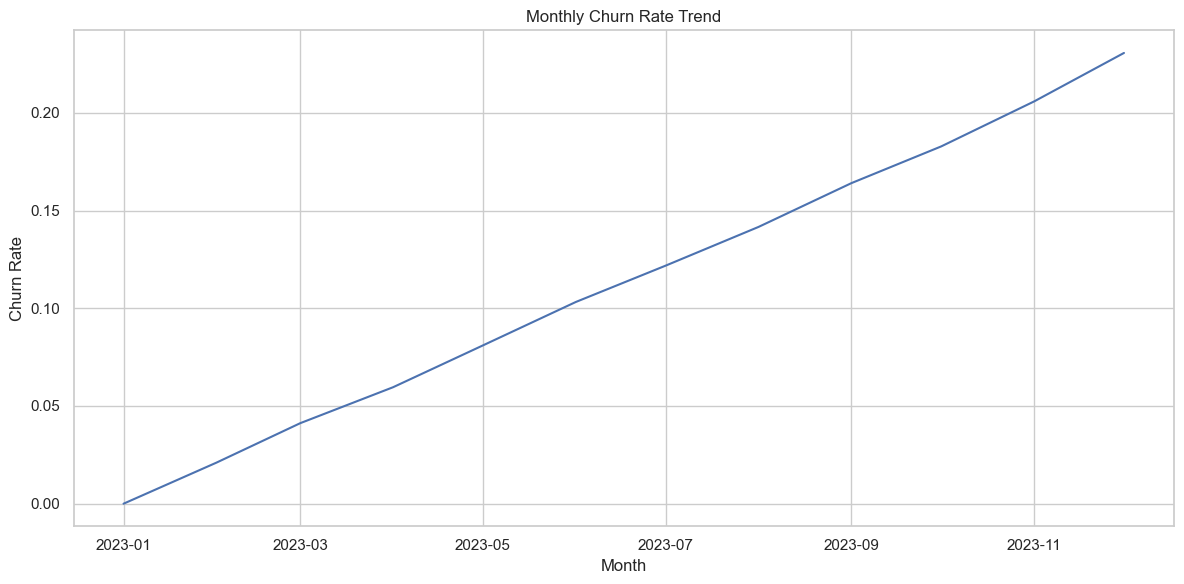

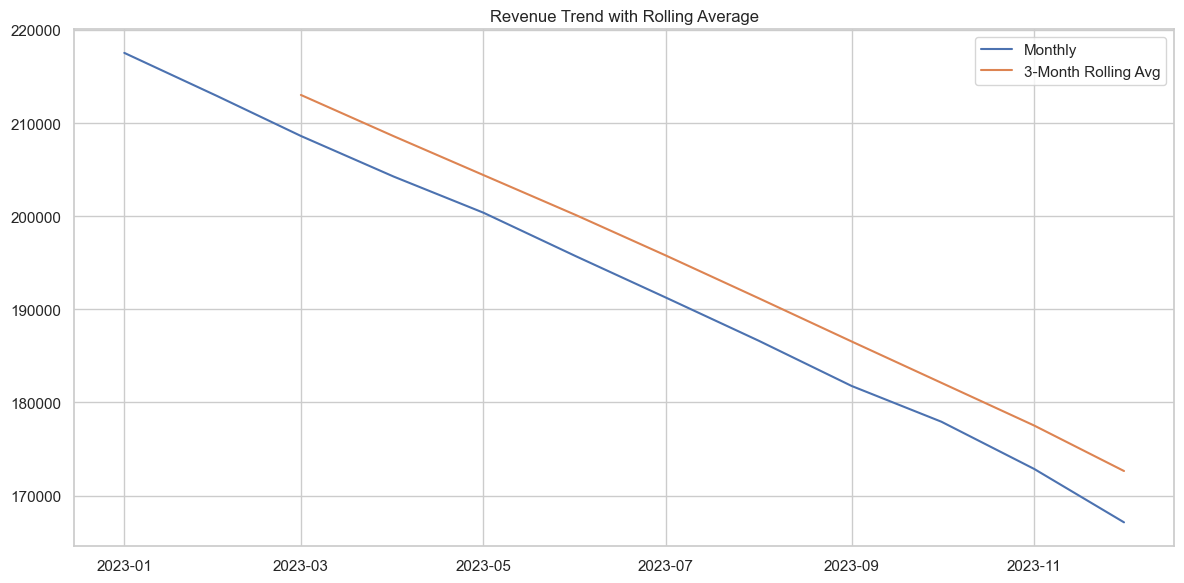

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("..")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv("data/cleaned/customer_analysis_dataset.csv")

# Monthly time dimension
np.random.seed(42)

months = pd.date_range(start="2023-01-01", periods=12, freq="MS")

time_df = pd.DataFrame({
    "customer_id": np.repeat(df["customer_id"], len(months)),
    "payment_month": months.tolist() * len(df)
})

time_df = time_df.merge(
    df[["customer_id", "monthly_revenue", "churned_flag"]],
    on="customer_id",
    how="left"
)

# Simulate churn over time
def simulate_churn(row):
    if row["churned_flag"] == 1:
        churn_month = np.random.choice(months)
        return row["payment_month"] <= churn_month
    return True

time_df["active"] = time_df.apply(simulate_churn, axis=1)
time_df["revenue"] = np.where(
    time_df["active"],
    time_df["monthly_revenue"],
    0
)

# Monthly revenue trend
monthly_revenue = (
    time_df.groupby("payment_month")["revenue"]
    .sum()
    .reset_index()
)

plt.plot(monthly_revenue["payment_month"], monthly_revenue["revenue"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.savefig("visuals/monthly_revenue_trend.png")
plt.show()

# Monthly churn trend
monthly_churn = (
    time_df.groupby("payment_month")["active"]
    .apply(lambda x: 1 - x.mean())
    .reset_index(name="churn_rate")
)

plt.plot(monthly_churn["payment_month"], monthly_churn["churn_rate"])
plt.title("Monthly Churn Rate Trend")
plt.xlabel("Month")
plt.ylabel("Churn Rate")
plt.tight_layout()
plt.savefig("visuals/monthly_churn_trend.png")
plt.show()

# Rolling averages
monthly_revenue["rolling_3m"] = monthly_revenue["revenue"].rolling(3).mean()

plt.plot(monthly_revenue["payment_month"], monthly_revenue["revenue"], label="Monthly")
plt.plot(monthly_revenue["payment_month"], monthly_revenue["rolling_3m"], label="3-Month Rolling Avg")
plt.legend()
plt.title("Revenue Trend with Rolling Average")
plt.tight_layout()
plt.savefig("visuals/revenue_rolling_average.png")
plt.show()



## Time-Series Insights

- Revenue shows a gradual decline corresponding with cumulative churn effects.
- Churn rates increase steadily over time, emphasizing the importance of early retention.
- Rolling averages smooth volatility and reveal underlying revenue trends.
- Time-based analysis highlights periods where proactive intervention would be most effective.
